In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import itertools
import warnings
import plotly.express as px
from statistics import mean

#CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
#from sklearn.feature_extraction.text import TfidfTransformer
from wordcloud import WordCloud

#Para datos
import nltk
from nltk.corpus import stopwords #eliminación stopwords
from nltk.tokenize import word_tokenize #contar palabras
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer
import re

#from sklearn.feature_extraction.text import TfidfVectorizer


Bad key "text.kerning_factor" on line 4 in
C:\Users\agosm\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
#Lectura del dataset 
path=  'C:/Users/agosm/Documents/tp_final/'

#Se leerá el dataset con los caracteres de la descripcion limpios
data = pd.read_csv(path + 'dataset_clear.csv',skipfooter=0, engine='python') 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45056 entries, 0 to 45055
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ExecutionId       44793 non-null  float64
 1   Interfaz          12014 non-null  float64
 2   CycleName         45056 non-null  object 
 3   Issue Key         45056 non-null  object 
 4   Test Summary      45056 non-null  object 
 5   Project           44945 non-null  object 
 6   Component         45056 non-null  object 
 7   Version           45056 non-null  object 
 8   Priority          44883 non-null  object 
 9   Assigned To       34798 non-null  object 
 10  Executed By       45056 non-null  object 
 11  Executed On       45056 non-null  object 
 12  Execution Status  45056 non-null  object 
 13  ExecutionDefects  4712 non-null   float64
 14  CreationDate      45056 non-null  object 
dtypes: float64(3), object(12)
memory usage: 5.2+ MB


In [3]:
data.head()

ExecutionId  Interfaz  CycleName    Issue Key  \
0     556214.0     164.0  Ejecucion  HYQA-122151   
1     556168.0       NaN  Ejecucion  HYQA-121971   
2     556122.0     164.0  Ejecucion  HYQA-122712   
3     556121.0     164.0  Ejecucion  HYQA-121954   
4     556016.0      39.0  Ejecucion  HYQA-122789   

                                        Test Summary                 Project  \
0  Archivo adjunto. SinieSiniestros Nova-Ramo 200...  Requerimientos de HyQA   
1                           Boton Nueva Fila y Tilde  Requerimientos de HyQA   
2   SinieSiniestros. Gestion Actividades de Sinie...  Requerimientos de HyQA   
3   Grilla Medicosfirmantes de certificado Comple...  Requerimientos de HyQA   
4  Caja y Banco - Carga de comprobante clase "M" ...  Requerimientos de HyQA   

                  Component            Version Priority           Assigned To  \
0  SSE_Mantenimiento_APNova        Unscheduled    Mayor  Casas Celeste Romina   
1  SSE_Mantenimiento_APNova   SSE-Nova-Appspre    Mayor      Epelbaum Adriana   
2  SSE_Mantenimiento_APNova   SSE-Nova-Appspre    Mayor      Epelbaum Adriana   
3  SSE_Mantenimiento_APNova   SSE-Nova-Appspre    Mayor      Epelbaum Adriana   
4  SSE_Mantenimiento_APNova  SSE-Nova-Appstest    Mayor     Sabena Diego Raul   

            Executed By Executed On Execution Status  ExecutionDefects  \
0  Casas Celeste Romina  06/10/2023         SUPERADO               NaN   
1      Epelbaum Adriana  05/10/2023      NO SUPERADO               3.0   
2      Epelbaum Adriana  05/10/2023         SUPERADO               NaN   
3      Epelbaum Adriana  05/10/2023         SUPERADO               NaN   
4     Sabena Diego Raul  04/10/2023         SUPERADO               NaN   

  CreationDate  
0   06/10/2023  
1   05/10/2023  
2   05/10/2023  
3   05/10/2023  
4   04/10/2023

In [4]:
data.columns

Index(['ExecutionId', 'Interfaz', 'CycleName', 'Issue Key', 'Test Summary',
       'Project', 'Component', 'Version', 'Priority', 'Assigned To',
       'Executed By', 'Executed On', 'Execution Status', 'ExecutionDefects',
       'CreationDate'],
      dtype='object')

In [5]:
len(data)

45056

**LIMPIEZA Y PRE PROCESADO DE DATOS**

In [3]:
from functions_dataset import clean_dataset
from functions_dataset import pre_processing_text
from functions_dataset import rename_column

data = clean_dataset(data)
data = pre_processing_text(data)
data = rename_column(data,'')
data.sample(10)

cycle_name                   component           version  \
28792         Ejecucion  SSE_Mantenimiento_APPCTime  SSe - Time - TST   
19508    Regresion_JAVA    SSE_Mantenimiento_APNova  SSE-Nova-Appspre   
31233         Ejecucion  SSE_Mantenimiento_APPCTime  SSe - Time - TST   
13197         Ejecucion    SSE_Mantenimiento_APNova  SSE-Nova-Appspre   
25206         Ejecucion  SSE_Mantenimiento_APPCTime    SSe - Time-PRE   
6758   Regresion_Deploy    SSE_Mantenimiento_APNova  SSE-Nova-Appspre   
31066         Ejecucion  SSE_Mantenimiento_APPCTime  SSe - Time - TST   
399           Ejecucion  SSE_Mantenimiento_APPCTime       Unscheduled   
20525         Ejecucion  SSE_Mantenimiento_APPCTime    SSe - Time-PRE   
30347         Ejecucion  SSE_Mantenimiento_APPCTime  SSe - Time - TST   

       priority                           executed_by executed_on  \
28792       5.0                         Gomez Daniela  2020-01-15   
19508       3.0                  Woloncewicz Marilina  2021-09-13   
31233       5.0                         Gomez Daniela  2019-01-15   
13197       3.0                Boffelli Martin Damian  2022-04-26   
25206       3.0                   Fau Cristina Vanesa  2021-03-31   
6758        3.0                      Epelbaum Adriana  2022-11-16   
31066       5.0                         Gomez Daniela  2019-01-15   
399         NaN  Bustamante Valerio Yomarli Del Valle  2023-08-30   
20525       2.0                Kiszkurno Pedro Manuel  2021-04-08   
30347       5.0                         Gomez Daniela  2019-01-15   

      execution_status creation_date      bugs_found  \
28792             pass    2020-01-15  not_found_bugs   
19508             pass    2021-03-09  not_found_bugs   
31233             pass    2019-01-15  not_found_bugs   
13197             pass    2022-04-25  not_found_bugs   
25206             fail    2021-03-31      found_bugs   
6758              pass    2022-11-16  not_found_bugs   
31066             pass    2019-01-15  not_found_bugs   
399               pass    2023-08-30  not_found_bugs   
20525             pass    2021-04-08  not_found_bugs   
30347             pass    2019-01-15  not_found_bugs   

                                         test_name_clean  
28792  Modificacion Mostrar campo Tratamiento poliza ...  
19508  Descripcion Con Ofrecimiento cambia Con Negoci...  
31233  Modificacion Mostrar campo Tratamiento poliza ...  
13197                  Validar campo Clientes demandados  
25206  TIME Emision  Ramo 2500 Prod 12  Excluir error...  
6758   1 Profesional cantidades asignadas tramite max...  
31066  Modificacion Mostrar campo Tratamiento poliza ...  
399    Ejecucion Opcion 20 tratamiento Certificados E...  
20525  Renta Diaria Internacion Cant max dias cubiert...  
30347  Modificacion Mostrar campo Tratamiento poliza ...

## Limpieza texto

In [4]:
#se eliminan la columna que no se utilizarán
data.drop(["cycle_name"], axis=1, inplace=True)
data.drop(["component"], axis=1, inplace=True)
data.drop(["version"], axis=1, inplace=True)
data.drop(["priority"], axis=1, inplace=True)
data.drop(["executed_by"], axis=1, inplace=True)
data.drop(["executed_on"], axis=1, inplace=True)
data.drop(["creation_date"], axis=1, inplace=True)

data.sample(5)

execution_status      bugs_found  \
24223             pass  not_found_bugs   
4336              pass  not_found_bugs   
17509             pass  not_found_bugs   
41645             pass  not_found_bugs   
12243             pass  not_found_bugs   

                                         test_name_clean  
24223  TIME Ramo 200 Prod 9  Revertir Cambios Deducib...  
4336                         Cobranza recibo DPP CL  403  
17509  Verificar NO aparezca descripcion tipo Orden S...  
41645  SinieSiniestros  Gestion SinieSiniestros  Cons...  
12243  Gestionar Indicios fraude Gestor cedulas Judic...

# Relación entre cantidad de palabras y fallos

In [8]:
#Se realiza una función para contar palabras distintas
set_dict = set()

def text_clean(text):
    #quitamos acentos
    #text = unidecode(text)
    #removemos lo que no son palabras, es decir simbolos y demás
    text = re.sub("[^a-zA-Z]", " ", text)
    #ponemos en minúsculas
    text = text.lower() #todas las palabras en minúscula
    #tokenizamos (ponemos una lista de palabras igual que split)
    text = word_tokenize(text)
    #almacenamos en un diccionario
    [set_dict.add(palabra) for palabra in text]
    #contamos
    return len(text)

data['cant_words'] = data.test_name_clean.map(text_clean) #nos la cuenta por fila de cada palabra

len(set_dict) #nos devuelve el número de palabras reales no repetidas

5854

In [9]:
data.sample(5)

execution_status      bugs_found  \
41117             pass  not_found_bugs   
24055             pass  not_found_bugs   
14062             fail      found_bugs   
40369             pass  not_found_bugs   
34442             pass  not_found_bugs   

                                         test_name_clean  cant_words  
41117  restriccion usuario TIME uso transaccion CA131...           8  
24055  Gestionar Comprobantes Mediaciones  Responsabl...           7  
14062    Cobro PS ARS CH dia retencion IIBB CH banco SOL          10  
40369           106117  Registrar Cedulas Juicio Todos 1           4  
34442  Emision  Ramo 600  Producto 13  Vincular pRici...           9

### Análisis de cantidad de palabras y ejecuciones

In [48]:
# Tabla de contigencia cant_words/execution_status
pd.crosstab(index=data['execution_status'],
            columns =data['cant_words'],margins=True )

cant_words          1     2     3     4     5     6     7     8     9    10  \
execution_status                                                              
fail               41   187   311   328   421   519   484   522   444   382   
pass              188  1137  2590  2367  2678  3629  8013  3402  2838  2389   
All               229  1324  2901  2695  3099  4148  8497  3924  3282  2771   

cant_words        ...  26  27  28  29  30  31  32  33  35    All  
execution_status  ...                                             
fail              ...  18  11  12   0   4   1   0   1   0   5016  
pass              ...  68  50  28  20   7   4   4   0   1  40040  
All               ...  86  61  40  20  11   5   4   1   1  45056  

[3 rows x 35 columns]

In [49]:
# Tabla de contigencia cant_words/execution_status en porcentajes relativos total
pd.crosstab(index=data['execution_status'],
            columns =data['cant_words'],margins=True).apply(lambda r: r/len(data)*100,
                                                         axis=1)

cant_words               1         2         3         4         5         6  \
execution_status                                                               
fail              0.090998  0.415039  0.690252  0.727983  0.934393  1.151900   
pass              0.417259  2.523526  5.748402  5.253462  5.943714  8.054421   
All               0.508256  2.938565  6.438654  5.981445  6.878107  9.206321   

cant_words                7         8         9        10  ...        26  \
execution_status                                           ...             
fail               1.074219  1.158558  0.985440  0.847834  ...  0.039950   
pass              17.784535  7.550604  6.298828  5.302290  ...  0.150923   
All               18.858754  8.709162  7.284268  6.150124  ...  0.190874   

cant_words              27        28        29        30        31        32  \
execution_status                                                               
fail              0.024414  0.026634  0.000000  0.008878  0.002219  0.000000   
pass              0.110973  0.062145  0.044389  0.015536  0.008878  0.008878   
All               0.135387  0.088778  0.044389  0.024414  0.011097  0.008878   

cant_words              33        35         All  
execution_status                                  
fail              0.002219  0.000000   11.132812  
pass              0.000000  0.002219   88.867188  
All               0.002219  0.002219  100.000000  

[3 rows x 35 columns]

In [50]:
# Tabla de contigencia cant_words/status en porcentajes relativos según execution_status
pd.crosstab(index=data['execution_status'],
            columns =data['cant_words'],margins=False).apply(lambda r: r/r.sum()*100,
                                                         axis=0)

cant_words              1          2          3          4          5   \
execution_status                                                         
fail              17.90393  14.123867  10.720441  12.170686  13.585027   
pass              82.09607  85.876133  89.279559  87.829314  86.414973   

cant_words               6          7          8          9          10  ...  \
execution_status                                                         ...   
fail              12.512054   5.696128  13.302752  13.528336  13.785637  ...   
pass              87.487946  94.303872  86.697248  86.471664  86.214363  ...   

cant_words               25         26         27    28     29         30  \
execution_status                                                            
fail              22.222222  20.930233  18.032787  30.0    0.0  36.363636   
pass              77.777778  79.069767  81.967213  70.0  100.0  63.636364   

cant_words          31     32     33     35  
execution_status                             
fail              20.0    0.0  100.0    0.0  
pass              80.0  100.0    0.0  100.0  

[2 rows x 34 columns]

### Gráficos 

In [10]:
from graphics import top_values

In [11]:
newdata = data
top_values('cant_words',newdata,10)

            execution_status  bugs_found  test_name_clean
cant_words                                               
7                       8497        8497             8497
6                       4148        4148             4148
8                       3924        3924             3924
9                       3282        3282             3282
5                       3099        3099             3099
3                       2901        2901             2901
10                      2771        2771             2771
4                       2695        2695             2695
11                      2563        2563             2563
12                      2264        2264             2264


In [32]:
top10 = newdata.loc[(newdata['cant_words'] == 7) | (newdata['cant_words'] == 8) | (newdata['cant_words'] == 6)
                    | (newdata['cant_words'] == 9) | (newdata['cant_words'] == 10) | (newdata['cant_words'] == 5)
                    | (newdata['cant_words'] == 3) | (newdata['cant_words'] == 4) | (newdata['cant_words'] == 11)
                    | (newdata['cant_words'] == 12)] 

top10

execution_status      bugs_found  \
0                 pass  not_found_bugs   
1                 fail      found_bugs   
2                 pass  not_found_bugs   
3                 pass  not_found_bugs   
4                 pass  not_found_bugs   
...                ...             ...   
45049             pass  not_found_bugs   
45050             fail  not_found_bugs   
45051             pass      found_bugs   
45054             pass  not_found_bugs   
45055             pass  not_found_bugs   

                                         test_name_clean  cant_words  
0      Archivo adjunto SinieSiniestros NovaRamo 200Mo...           6  
1                                 Boton Nueva Fila Tilde           4  
2      SinieSiniestros Gestion Actividades SinieSinie...          12  
3        Grilla Medicosfirmantes certificado Completitud           4  
4      Caja Banco  Carga comprobante clase M  PersFis...          10  
...                                                  ...         ...  
45049              Pago Comisiones Time SiP  Cred Deb vs           7  
45050              Pago Comisiones Time SiP  Cred Deb vs           7  
45051           Control XMLNS correspondientes cabeceras           4  
45054                          Control campos opcionales           3  
45055                        Control campos obligatorios           3  

[36144 rows x 4 columns]

<AxesSubplot:title={'center':'Gráfico de barras según cantidad de palabras'}, xlabel='cant_words'>

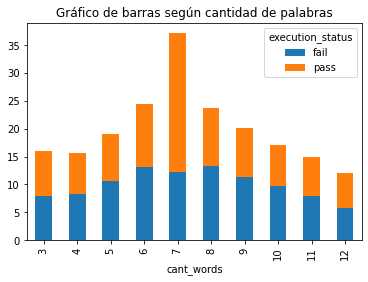

In [30]:
#Gráfico de barras def max_graph (top,column,column_group,kind_grap,bugs): max_graph(data,'priority','execution_status','bar',False)
pd.crosstab(index=top10['cant_words'],
                columns =data['execution_status'],margins=False).apply(lambda r: r/r.sum()*100,
                                                         axis=0).plot(kind='bar',stacked=True,
                                                        title = 'Gráfico de barras según cantidad de palabras')

array([<AxesSubplot:ylabel='fail'>, <AxesSubplot:ylabel='pass'>],
      dtype=object)

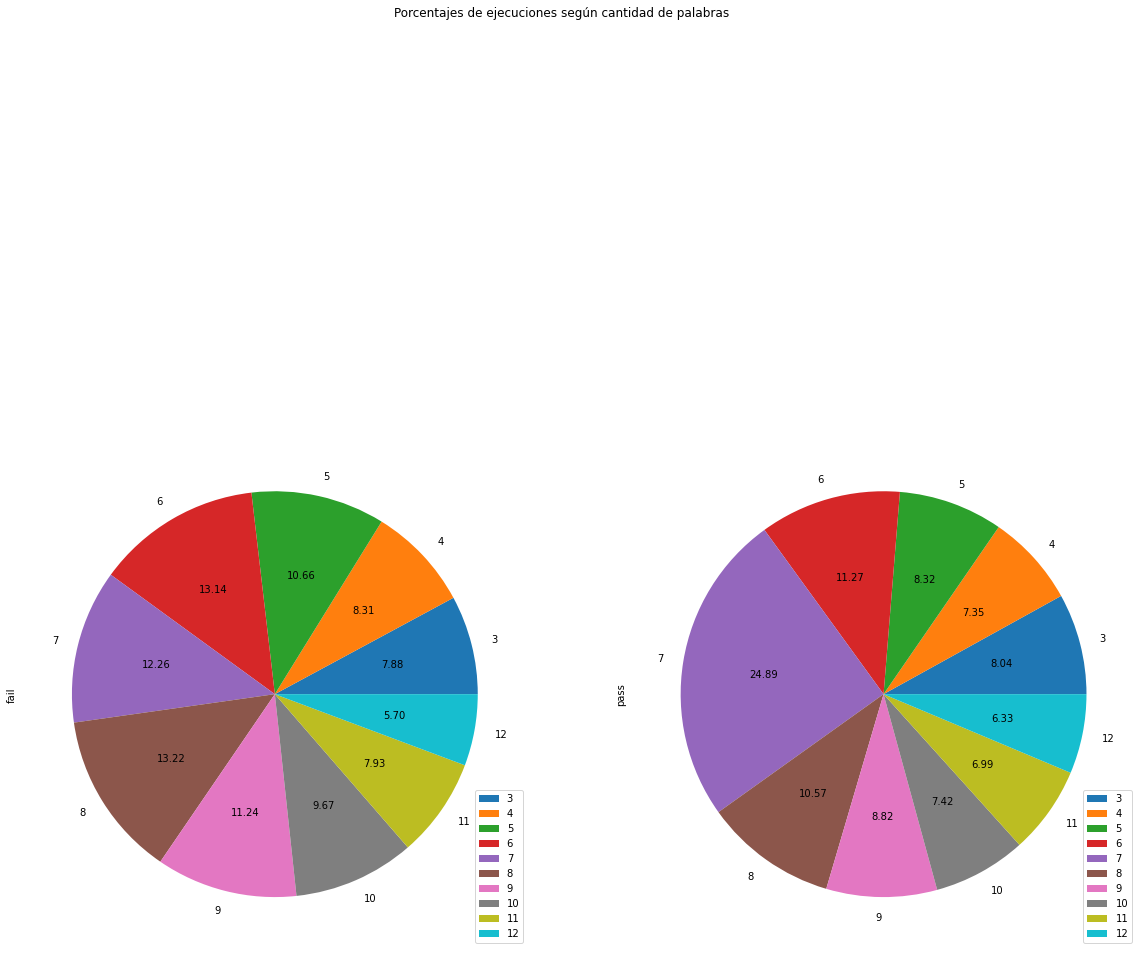

In [31]:
#Gráfico de torta ejecuciones según cantidad de palabras
pd.crosstab(index=top10['cant_words'],
                columns =top10['execution_status'],margins=False).apply(lambda r: r/r.sum()*100,
                                                         axis=0).plot(kind='pie',subplots=True,
                                                                      autopct="%.2f",fontsize=10,
                                     figsize=(20,20),
                                     title = 'Porcentajes de ejecuciones según cantidad de palabras')

array([<AxesSubplot:ylabel='3'>, <AxesSubplot:ylabel='4'>,
       <AxesSubplot:ylabel='5'>, <AxesSubplot:ylabel='6'>,
       <AxesSubplot:ylabel='7'>, <AxesSubplot:ylabel='8'>,
       <AxesSubplot:ylabel='9'>, <AxesSubplot:ylabel='10'>,
       <AxesSubplot:ylabel='11'>, <AxesSubplot:ylabel='12'>], dtype=object)

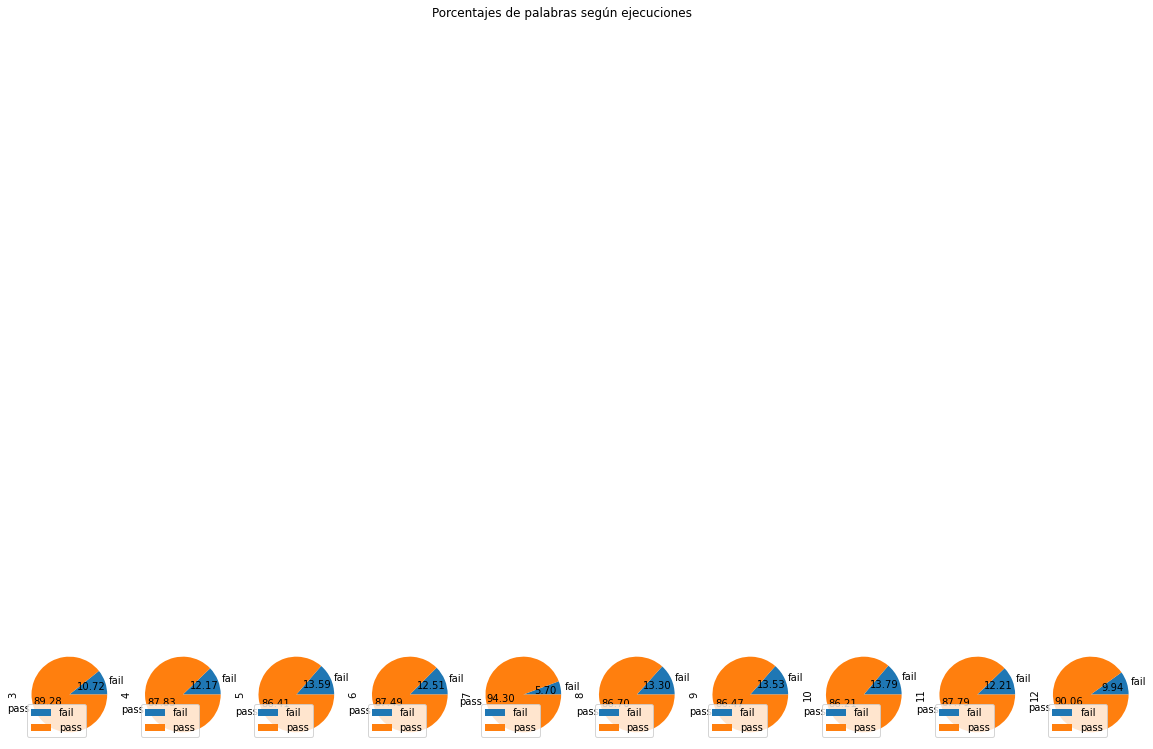

In [32]:
#Gráfico de tortas cantidad de palabras según ejecuciones
pd.crosstab(index=top10['execution_status'],
            columns =top10['cant_words'],margins=False).apply(lambda r: r/r.sum()*100,
                                                axis=0).plot(kind='pie',subplots=True,
                                                autopct="%.2f",fontsize=10,
                                                figsize=(20,20),
                                                title = 'Porcentajes de palabras según ejecuciones')

###### CONCLUSIÓN
Con las columnas test_name_clean se creó una nueva columna denominada cant_words (cantidad de palabras que posee el nombre del caso). A partir de este dato se analizó si a mayor cantidad de palabras en el nombre (suponiendo que existe una mayor información de lo que se prueba en el caso) más fallos presentará la ejecución.
Como se puede observar tanto en los gráficos como en las tablas, esto no es así, por ejemplo, si tiene 29 palabras se visualiza que el caso fue exitoso, mientras que con 10 palabras hay un 80% de que el caso pase.

# Stemming - Lemmatization

In [11]:
from functions_dataset import stemming_lemmatization
data = stemming_lemmatization(data)

In [13]:
data

execution_status      bugs_found  \
0                 pass  not_found_bugs   
1                 fail      found_bugs   
2                 pass  not_found_bugs   
3                 pass  not_found_bugs   
4                 pass  not_found_bugs   
...                ...             ...   
45051             pass      found_bugs   
45052             pass      found_bugs   
45053             fail  not_found_bugs   
45054             pass  not_found_bugs   
45055             pass  not_found_bugs   

                                         test_name_clean  cant_words  \
0      Archivo adjunto SinieSiniestros NovaRamo 200Mo...           6   
1                                 Boton Nueva Fila Tilde           4   
2      SinieSiniestros Gestion Actividades SinieSinie...          12   
3        Grilla Medicosfirmantes certificado Completitud           4   
4      Caja Banco  Carga comprobante clase M  PersFis...          10   
...                                                  ...         ...   
45051           Control XMLNS correspondientes cabeceras           4   
45052                                      Control firma           2   
45053                                      Control firma           2   
45054                          Control campos opcionales           3   
45055                        Control campos obligatorios           3   

                                       test_name_stemmed  \
0      archivo adjunto siniesiniestro novaramo 200mon...   
1                                  boton nueva fila tild   
2      siniesiniestro gestion actividad siniesiniestr...   
3          grilla medicosfirmant certificado completitud   
4      caja banco carga comprobant clase m persfisica...   
...                                                  ...   
45051               control xmln correspondient cabecera   
45052                                      control firma   
45053                                      control firma   
45054                             control campo opcional   
45055                          control campo obligatorio   

                                    test_name_lemmatized  
0      Archivo adjunto SinieSiniestros NovaRamo 200Mo...  
1                                 Boton Nueva Fila Tilde  
2      SinieSiniestros Gestion Actividades SinieSinie...  
3        Grilla Medicosfirmantes certificado Completitud  
4      Caja Banco Carga comprobante clase M PersFisic...  
...                                                  ...  
45051           Control XMLNS correspondientes cabeceras  
45052                                      Control firma  
45053                                      Control firma  
45054                          Control campos opcionales  
45055                        Control campos obligatorios  

[45056 rows x 6 columns]

# Bag of words

### Ver casos según aplicación 

In [12]:
from graphics import max_graph_app
from functions_dataset import new_column_app

In [13]:
data['apps'] = ''

In [14]:
data = new_column_app('time',data)
data = new_column_app('sap',data)
data = new_column_app('bup',data)
data = new_column_app('ceibo',data)
data = new_column_app('nova',data)
data = new_column_app('gw',data)

In [15]:
data['apps'].unique().tolist()
#data['apps'].unique().tolist()

['', 'gw', 'nova', 'time', 'bup', 'sap', 'ceibo']

In [19]:
data['apps'].value_counts()

         42165
time      1789
nova       782
gw         135
ceibo      103
sap         72
bup         10
Name: apps, dtype: int64

In [20]:
data.sample(5)

execution_status      bugs_found  \
24789             pass  not_found_bugs   
41176             pass  not_found_bugs   
43567             pass  not_found_bugs   
21600             pass  not_found_bugs   
36139             pass  not_found_bugs   

                                         test_name_clean  cant_words  \
24789  Anular Reclamo  Gestion Reclamo Predenuncias R...           6   
41176                         Validar json enviar Caso 1           4   
43567  Modificacion GE Poliza multilocalidad certif r...          12   
21600          SinieSiniestros Ampliar Denuncia Ramo 200           4   
36139  Gestionar Comprobantes Mediaciones  Responsabl...           7   

                                       test_name_stemmed  \
24789  anular reclamo gestion reclamo predenuncia ram...   
41176                         validar json enviar caso 1   
43567  modificacion ge poliza multilocalidad certif r...   
21600           siniesiniestro ampliar denuncia ramo 200   
36139  gestionar comprobant mediacion respons inscrip...   

                                    test_name_lemmatized apps  
24789  Anular Reclamo Gestion Reclamo Predenuncias Ra...       
41176                         Validar json enviar Caso 1       
43567  Modificacion GE Poliza multilocalidad certif r...       
21600          SinieSiniestros Ampliar Denuncia Ramo 200       
36139  Gestionar Comprobantes Mediaciones Responsable...

In [21]:
# Tabla de contigencia priority/execution_status
pd.crosstab(index=data['execution_status'],
            columns =data['apps'],margins=True )

apps                     bup  ceibo   gw  nova  sap  time    All
execution_status                                                
fail               4680    2     15   19   117   38   145   5016
pass              37485    8     88  116   665   34  1644  40040
All               42165   10    103  135   782   72  1789  45056

###### CONCLUSIÓN
Se analizó la aplicación en la cual se ejecutó el caso y se determinó que las aplicaciones que más fallos presentan son TIME y NOVA. Mientras que BUP es la que más estable se encuentra ya que presenta más ejecuciones exitosas

<function pandas.core.reshape.pivot.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False) -> 'DataFrame'>

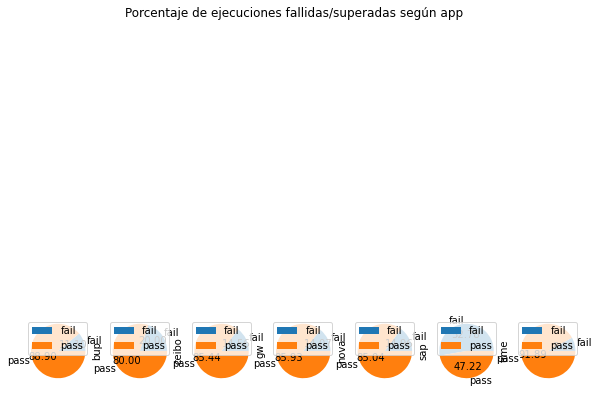

In [45]:
max_graph_app(data,'execution_status','',False)

<function pandas.core.reshape.pivot.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False) -> 'DataFrame'>

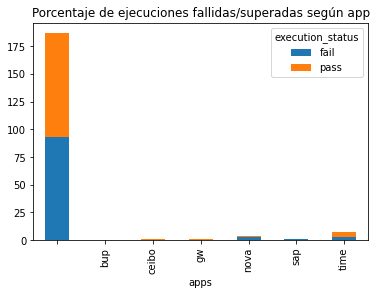

In [46]:
max_graph(data,'execution_status','bar',False)

array([<AxesSubplot:ylabel='fail'>, <AxesSubplot:ylabel='pass'>],
      dtype=object)

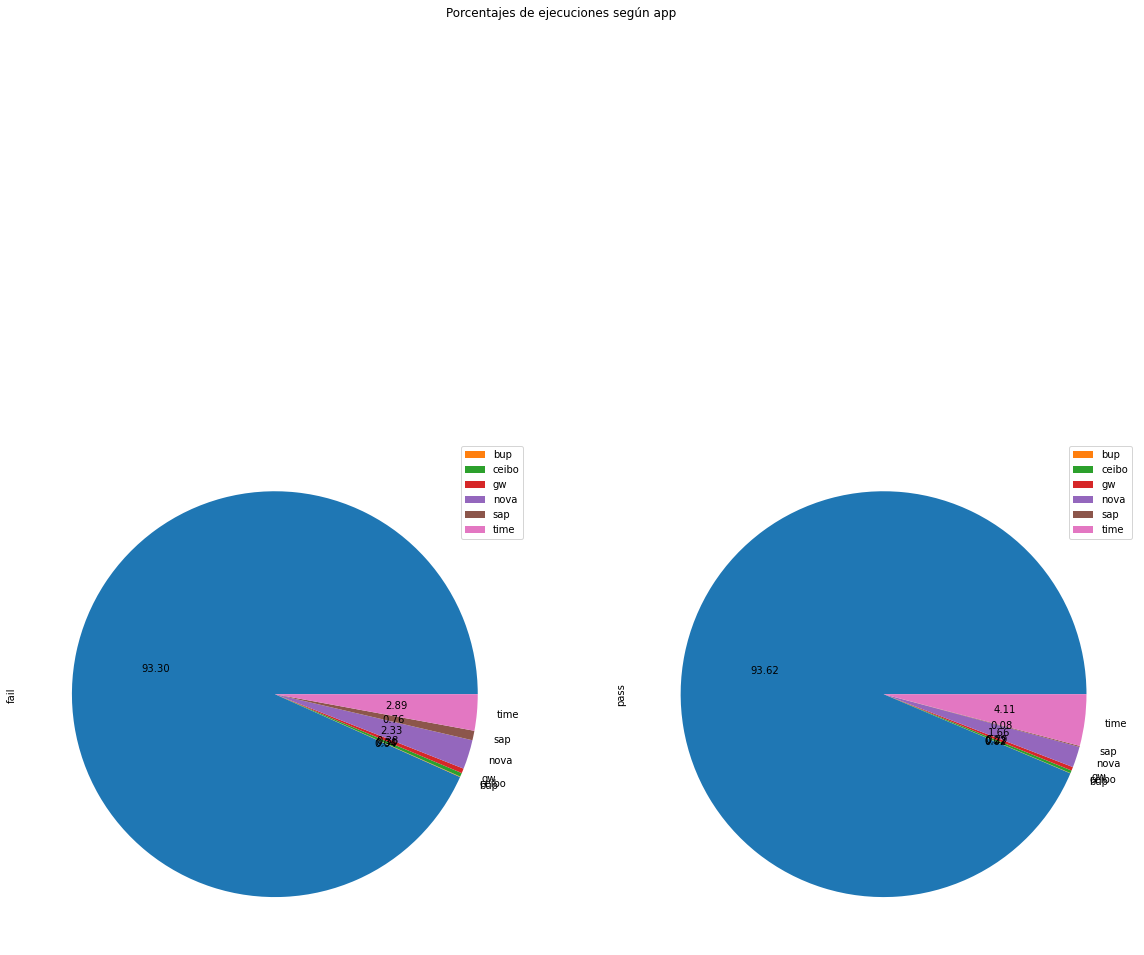

In [47]:
#Gráfico de torta ejecuciones según app
pd.crosstab(index=data['apps'],
                columns =data['execution_status'],margins=False).apply(lambda r: r/r.sum()*100,
                                                         axis=0).plot(kind='pie',subplots=True,
                                                                      autopct="%.2f",fontsize=10,
                                     figsize=(20,20),
                                     title = 'Porcentajes de ejecuciones según app')

### Countvectorizer

In [48]:
CountVectorizer?

In [49]:
stop = list(stopwords.words('spanish'))

In [50]:
# Vectorizar mediante countvectorizer
corpus = data.test_name_stemmed #columna a la que se le aplica countvectorizer

vectorizer = CountVectorizer(binary=False,ngram_range=(1, 1),analyzer='word',token_pattern=r'\b[^\W\d_]+\b',
                             max_features=100,stop_words=stop) 

vectorizer.fit_transform(corpus)

<45056x100 sparse matrix of type '<class 'numpy.int64'>'
	with 189874 stored elements in Compressed Sparse Row format>

In [51]:
term_doc_matrix = vectorizer.fit_transform(corpus)

vectorizer.get_feature_names()

['actividad',
 'alta',
 'ampliar',
 'anulacion',
 'ar',
 'archivo',
 'asegurado',
 'baja',
 'banco',
 'bp',
 'caja',
 'campo',
 'carga',
 'causa',
 'cedula',
 'certificado',
 'chequ',
 'client',
 'cobertura',
 'cobranza',
 'compania',
 'comprobant',
 'concepto',
 'consulta',
 'consultar',
 'danio',
 'dato',
 'denuncia',
 'documento',
 'emis',
 'error',
 'factura',
 'fecha',
 'generar',
 'gestion',
 'gestionar',
 'gestor',
 'grilla',
 'gw',
 'individu',
 'ingreso',
 'judici',
 'juicio',
 'liquidacion',
 'mantenimiento',
 'mediacion',
 'mensaj',
 'modificacion',
 'modificar',
 'moneda',
 'monto',
 'mostrar',
 'nota',
 'notificacion',
 'nova',
 'nueva',
 'nuevo',
 'opcion',
 'orden',
 'pago',
 'pantalla',
 'parcial',
 'pericia',
 'persona',
 'poliza',
 'predenuncia',
 'prod',
 'producto',
 'ramo',
 'recibo',
 'reclamo',
 'registrar',
 'report',
 'reserva',
 'rol',
 's',
 'sap',
 'sentencia',
 'servicio',
 'si',
 'siniesiniestro',
 'siniestro',
 'ssa',
 'ssu',
 'tabla',
 'tercero',
 'time'

In [52]:
print(vectorizer.get_feature_names())
print(term_doc_matrix.toarray())

['actividad', 'alta', 'ampliar', 'anulacion', 'ar', 'archivo', 'asegurado', 'baja', 'banco', 'bp', 'caja', 'campo', 'carga', 'causa', 'cedula', 'certificado', 'chequ', 'client', 'cobertura', 'cobranza', 'compania', 'comprobant', 'concepto', 'consulta', 'consultar', 'danio', 'dato', 'denuncia', 'documento', 'emis', 'error', 'factura', 'fecha', 'generar', 'gestion', 'gestionar', 'gestor', 'grilla', 'gw', 'individu', 'ingreso', 'judici', 'juicio', 'liquidacion', 'mantenimiento', 'mediacion', 'mensaj', 'modificacion', 'modificar', 'moneda', 'monto', 'mostrar', 'nota', 'notificacion', 'nova', 'nueva', 'nuevo', 'opcion', 'orden', 'pago', 'pantalla', 'parcial', 'pericia', 'persona', 'poliza', 'predenuncia', 'prod', 'producto', 'ramo', 'recibo', 'reclamo', 'registrar', 'report', 'reserva', 'rol', 's', 'sap', 'sentencia', 'servicio', 'si', 'siniesiniestro', 'siniestro', 'ssa', 'ssu', 'tabla', 'tercero', 'time', 'tipo', 'total', 'tramit', 'transaccion', 'tratamiento', 'validacion', 'validar', 'v

In [53]:
# Put BoW vectors into a new dataframe
test_bow = pd.DataFrame(term_doc_matrix.toarray(), columns=vectorizer.get_feature_names())
print(test_bow)

       actividad  alta  ampliar  anulacion  ar  archivo  asegurado  baja  \
0              0     0        0          0   0        1          0     0   
1              0     0        0          0   0        0          0     0   
2              1     0        0          0   0        0          0     0   
3              0     0        0          0   0        0          0     0   
4              0     0        0          0   0        0          0     0   
...          ...   ...      ...        ...  ..      ...        ...   ...   
45051          0     0        0          0   0        0          0     0   
45052          0     0        0          0   0        0          0     0   
45053          0     0        0          0   0        0          0     0   
45054          0     0        0          0   0        0          0     0   
45055          0     0        0          0   0        0          0     0   

       banco  bp  ...  transaccion  tratamiento  validacion  validar  vario  \
0       

### TfidfVectorizer 

In [54]:
# Vectorizar mediante tfidfvectorizer

tfidf_vectorizer = TfidfVectorizer (binary=False,ngram_range=(1, 1),analyzer='word',token_pattern=r'\b[^\W\d_]+\b'
                                    ,max_features=100,stop_words=stop)

x = tfidf_vectorizer.fit_transform(corpus)

print(tfidf_vectorizer.get_feature_names())

['actividad', 'alta', 'ampliar', 'anulacion', 'ar', 'archivo', 'asegurado', 'baja', 'banco', 'bp', 'caja', 'campo', 'carga', 'causa', 'cedula', 'certificado', 'chequ', 'client', 'cobertura', 'cobranza', 'compania', 'comprobant', 'concepto', 'consulta', 'consultar', 'danio', 'dato', 'denuncia', 'documento', 'emis', 'error', 'factura', 'fecha', 'generar', 'gestion', 'gestionar', 'gestor', 'grilla', 'gw', 'individu', 'ingreso', 'judici', 'juicio', 'liquidacion', 'mantenimiento', 'mediacion', 'mensaj', 'modificacion', 'modificar', 'moneda', 'monto', 'mostrar', 'nota', 'notificacion', 'nova', 'nueva', 'nuevo', 'opcion', 'orden', 'pago', 'pantalla', 'parcial', 'pericia', 'persona', 'poliza', 'predenuncia', 'prod', 'producto', 'ramo', 'recibo', 'reclamo', 'registrar', 'report', 'reserva', 'rol', 's', 'sap', 'sentencia', 'servicio', 'si', 'siniesiniestro', 'siniestro', 'ssa', 'ssu', 'tabla', 'tercero', 'time', 'tipo', 'total', 'tramit', 'transaccion', 'tratamiento', 'validacion', 'validar', 'v

In [55]:
print(tfidf_vectorizer.get_feature_names())
print(term_doc_matrix.toarray())

['actividad', 'alta', 'ampliar', 'anulacion', 'ar', 'archivo', 'asegurado', 'baja', 'banco', 'bp', 'caja', 'campo', 'carga', 'causa', 'cedula', 'certificado', 'chequ', 'client', 'cobertura', 'cobranza', 'compania', 'comprobant', 'concepto', 'consulta', 'consultar', 'danio', 'dato', 'denuncia', 'documento', 'emis', 'error', 'factura', 'fecha', 'generar', 'gestion', 'gestionar', 'gestor', 'grilla', 'gw', 'individu', 'ingreso', 'judici', 'juicio', 'liquidacion', 'mantenimiento', 'mediacion', 'mensaj', 'modificacion', 'modificar', 'moneda', 'monto', 'mostrar', 'nota', 'notificacion', 'nova', 'nueva', 'nuevo', 'opcion', 'orden', 'pago', 'pantalla', 'parcial', 'pericia', 'persona', 'poliza', 'predenuncia', 'prod', 'producto', 'ramo', 'recibo', 'reclamo', 'registrar', 'report', 'reserva', 'rol', 's', 'sap', 'sentencia', 'servicio', 'si', 'siniesiniestro', 'siniestro', 'ssa', 'ssu', 'tabla', 'tercero', 'time', 'tipo', 'total', 'tramit', 'transaccion', 'tratamiento', 'validacion', 'validar', 'v

In [56]:
transformer = TfidfTransformer()
tf_idf = transformer.fit_transform(x)
term_doc_matrix_tfidf = pd.DataFrame(tf_idf.toarray(),columns=tfidf_vectorizer.get_feature_names())
term_doc_matrix_tfidf 

actividad  alta  ampliar  anulacion   ar   archivo  asegurado  baja  \
0       0.000000   0.0      0.0        0.0  0.0  0.870718        0.0   0.0   
1       0.000000   0.0      0.0        0.0  0.0  0.000000        0.0   0.0   
2       0.437573   0.0      0.0        0.0  0.0  0.000000        0.0   0.0   
3       0.000000   0.0      0.0        0.0  0.0  0.000000        0.0   0.0   
4       0.000000   0.0      0.0        0.0  0.0  0.000000        0.0   0.0   
...          ...   ...      ...        ...  ...       ...        ...   ...   
45051   0.000000   0.0      0.0        0.0  0.0  0.000000        0.0   0.0   
45052   0.000000   0.0      0.0        0.0  0.0  0.000000        0.0   0.0   
45053   0.000000   0.0      0.0        0.0  0.0  0.000000        0.0   0.0   
45054   0.000000   0.0      0.0        0.0  0.0  0.000000        0.0   0.0   
45055   0.000000   0.0      0.0        0.0  0.0  0.000000        0.0   0.0   

          banco   bp  ...  transaccion  tratamiento  validacion  validar  \
0      0.000000  0.0  ...          0.0          0.0         0.0      0.0   
1      0.000000  0.0  ...          0.0          0.0         0.0      0.0   
2      0.000000  0.0  ...          0.0          0.0         0.0      0.0   
3      0.000000  0.0  ...          0.0          0.0         0.0      0.0   
4      0.514615  0.0  ...          0.0          0.0         0.0      0.0   
...         ...  ...  ...          ...          ...         ...      ...   
45051  0.000000  0.0  ...          0.0          0.0         0.0      0.0   
45052  0.000000  0.0  ...          0.0          0.0         0.0      0.0   
45053  0.000000  0.0  ...          0.0          0.0         0.0      0.0   
45054  0.000000  0.0  ...          0.0          0.0         0.0      0.0   
45055  0.000000  0.0  ...          0.0          0.0         0.0      0.0   

       vario  vehiculo  verificando  verificar  visualizar   ws  
0        0.0       0.0          0.0        0.0         0.0  0.0  
1        0.0       0.0          0.0        0.0         0.0  0.0  
2        0.0       0.0          0.0        0.0         0.0  0.0  
3        0.0       0.0          0.0        0.0         0.0  0.0  
4        0.0       0.0          0.0        0.0         0.0  0.0  
...      ...       ...          ...        ...         ...  ...  
45051    0.0       0.0          0.0        0.0         0.0  0.0  
45052    0.0       0.0          0.0        0.0         0.0  0.0  
45053    0.0       0.0          0.0        0.0         0.0  0.0  
45054    0.0       0.0          0.0        0.0         0.0  0.0  
45055    0.0       0.0          0.0        0.0         0.0  0.0  

[45056 rows x 100 columns]

#### WORD CLOUD de palabras más repitidas en casos fallidos/exitosos 

In [5]:
def is_number(nro):
    try:
        float(nro)
    except ValueError:
        return False
    return True

In [6]:
def data_no_number (data):
    data['test_name_stemmed'] = data['test_name_stemmed'].map(lambda x: ''.join([i for i in x if i.isdigit() !=True])).astype(str)
            
    return data

##### Casos exitosos 

In [67]:
#pip install pillow==9.5

  Attempting uninstall: pillow
    Found existing installation: pillow 10.2.0
    Uninstalling pillow-10.2.0:
      Successfully uninstalled pillow-10.2.0
Note: you may need to restart the kernel to use updated packages.


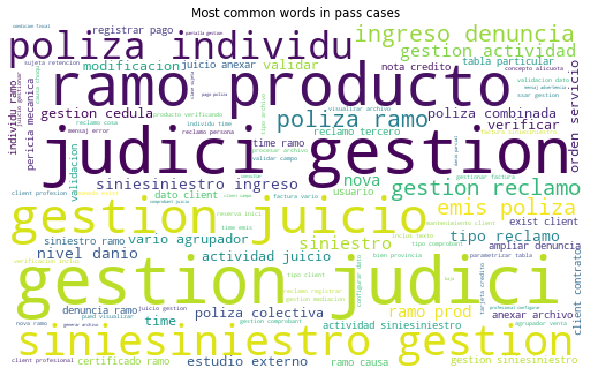

In [16]:
#Aparición de palabras en casos exitosos

words_list_past = data_no_number(data)[data['execution_status']=='pass']['test_name_stemmed'].unique().tolist()
pass_case = " ".join(words_list_past)

pass_wordcloud =  WordCloud(width=500, height = 300, max_words=100,background_color='white',
                            min_word_length=4,regexp=r'\b[^\W\d_]+\b').generate(pass_case)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(pass_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Most common words in pass cases')
plt.show()

###### CONCLUSIÓN
Como se puede observa en el gráfico anterior, las palabras que más aparecen en casos superados son: ramo, producto, gestion, juicio (y sus variantes), póliza y siniesto

In [69]:
# tfidfvectorizer para palabras en casos exitosos

tfidf_vectorizer_pass = TfidfVectorizer (binary=False,ngram_range=(1, 1),analyzer='word',token_pattern=r'\b[^\W\d_]+\b'
                                    ,max_features=100,stop_words=stop)

y = tfidf_vectorizer_pass.fit_transform(words_list_past)

transformer = TfidfTransformer()
tf_idf_pass = transformer.fit_transform(y)
term_doc_matrix_tfidf_pass = pd.DataFrame(tf_idf_pass.toarray(),columns=tfidf_vectorizer_pass.get_feature_names())
term_doc_matrix_tfidf_pass 

actividad  alta  anulacion   ar   archivo  asegurado    b   bp  campo  \
0       0.000000   0.0        0.0  0.0  0.524442        0.0  0.0  0.0    0.0   
1       0.433987   0.0        0.0  0.0  0.000000        0.0  0.0  0.0    0.0   
2       0.000000   0.0        0.0  0.0  0.000000        0.0  0.0  0.0    0.0   
3       0.000000   0.0        0.0  0.0  0.000000        0.0  0.0  0.0    0.0   
4       0.000000   0.0        0.0  0.0  0.000000        0.0  0.0  0.0    0.0   
...          ...   ...        ...  ...       ...        ...  ...  ...    ...   
15762   0.000000   0.0        0.0  0.0  0.000000        0.0  0.0  0.0    0.0   
15763   0.000000   0.0        0.0  0.0  0.000000        0.0  0.0  0.0    0.0   
15764   0.000000   0.0        0.0  0.0  0.000000        0.0  0.0  0.0    0.0   
15765   0.000000   0.0        0.0  0.0  0.000000        0.0  0.0  0.0    0.0   
15766   0.000000   0.0        0.0  0.0  0.000000        0.0  0.0  0.0    0.0   

          carga  ...  validar  valor  vario  vehiculo  verificacion  \
0      0.000000  ...      0.0    0.0    0.0       0.0           0.0   
1      0.000000  ...      0.0    0.0    0.0       0.0           0.0   
2      0.000000  ...      0.0    0.0    0.0       0.0           0.0   
3      0.811956  ...      0.0    0.0    0.0       0.0           0.0   
4      0.000000  ...      0.0    0.0    0.0       0.0           0.0   
...         ...  ...      ...    ...    ...       ...           ...   
15762  0.000000  ...      0.0    0.0    0.0       0.0           0.0   
15763  0.000000  ...      0.0    0.0    0.0       0.0           0.0   
15764  0.000000  ...      0.0    0.0    0.0       0.0           0.0   
15765  0.000000  ...      0.0    0.0    0.0       0.0           0.0   
15766  0.000000  ...      0.0    0.0    0.0       0.0           0.0   

       verificando  verificar  via  visualizar   ws  
0              0.0        0.0  0.0         0.0  0.0  
1              0.0        0.0  0.0         0.0  0.0  
2              0.0        0.0  0.0         0.0  0.0  
3              0.0        0.0  0.0         0.0  0.0  
4              0.0        0.0  0.0         0.0  0.0  
...            ...        ...  ...         ...  ...  
15762          0.0        0.0  0.0         0.0  0.0  
15763          0.0        0.0  0.0         0.0  0.0  
15764          0.0        0.0  0.0         0.0  0.0  
15765          0.0        0.0  0.0         0.0  0.0  
15766          0.0        0.0  0.0         0.0  0.0  

[15767 rows x 100 columns]

##### Casos fallidos 

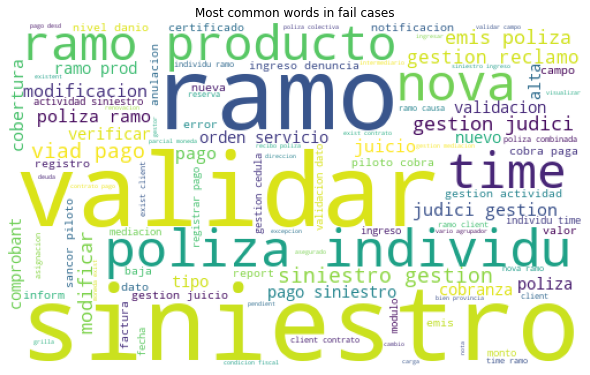

In [52]:
#Aparición de palabras en casos fallados
words_list_fail = data_no_number(data)[data['execution_status']=='fail']['test_name_stemmed'].unique().tolist()
fail_case = " ".join(words_list_fail)

fail_wordcloud =  WordCloud(width=500, height = 300, max_words=100,min_word_length=4,background_color='white',
                            regexp=r'\b[^\W\d_]+\b').generate(fail_case)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(fail_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Most common words in fail cases')
plt.show()

###### CONCLUSIÓN
Como se puede observa en el gráfico anterior, las palabras que más aparecen en casos no superados son: ramo, validar, póliza, time y siniesto. Siendo siniesto, ramo y validar las más destacadas

In [70]:
# tfidfvectorizer para palabras en casos fallados

tfidf_vectorizer_fail = TfidfVectorizer (binary=False,ngram_range=(1, 1),analyzer='word',token_pattern=r'\b[^\W\d_]+\b'
                                    ,max_features=100,stop_words=stop)

y = tfidf_vectorizer_fail.fit_transform(words_list_fail)

transformer = TfidfTransformer()
tf_idf_fail = transformer.fit_transform(y)
term_doc_matrix_tfidf_fail = pd.DataFrame(tf_idf_fail.toarray(),columns=tfidf_vectorizer_fail.get_feature_names())
term_doc_matrix_tfidf_fail 

NameError: name 'words_list_fail' is not defined

#### Comparación aparición de palabras 

In [54]:
#Se crea diccionario de las palabras que aparecen en caso que falla
dictonary_execution_fail = WordCloud(collocations=False,max_words=100,min_word_length=4,include_numbers=False).process_text(fail_case)
dictonary_execution_fail

{'boton': 40,
 'nueva': 100,
 'fila': 7,
 'tild': 7,
 'nova': 176,
 'ramo': 732,
 'gestion': 486,
 'reclamo': 310,
 'registrar': 108,
 'estimacion': 26,
 'siniestro': 626,
 'ampliar': 43,
 'denuncia': 127,
 'baja': 55,
 'excepcion': 29,
 'ingresar': 27,
 'campo': 144,
 'obligatorio': 29,
 'opcion': 53,
 'fecha': 116,
 'grilla': 88,
 'comprobant': 144,
 'desd': 38,
 'hasta': 1,
 'anterior': 13,
 'emis': 186,
 'validarenvia': 1,
 'informacion': 27,
 'orion': 27,
 'derivacion': 41,
 'automatica': 30,
 'tercero': 84,
 'figura': 17,
 'damnificado': 13,
 'gestionar': 83,
 'factura': 149,
 'stro': 19,
 'registrado': 16,
 'respons': 10,
 'inscripto': 14,
 'pestania': 62,
 'archivo': 132,
 'anexo': 16,
 'adjunto': 12,
 'inform': 80,
 'realizar': 27,
 'pericia': 61,
 'mecanica': 24,
 'mediacion': 103,
 'luego': 9,
 'carga': 72,
 'clase': 8,
 'persfisica': 1,
 'sociedad': 1,
 'juridica': 22,
 'ejecucion': 15,
 'masiva': 41,
 'tratamiento': 26,
 'certificado': 93,
 'transaccion': 51,
 'antigua': 1

In [55]:
#Se crea diccionario de las palabras que aparecen en caso exitosos
dictonary_execution_pass = WordCloud(collocations=False,max_words=100,min_word_length=4,include_numbers=False).process_text(pass_case)
dictonary_execution_pass

{'archivo': 987,
 'adjunto': 44,
 'siniestro': 3461,
 'novaramo': 2,
 'monto': 323,
 'mayor': 125,
 'gestion': 3807,
 'actividad': 1043,
 'realizar': 127,
 'pericia': 533,
 'medica': 169,
 'boton': 155,
 'aceptar': 27,
 'agregar': 127,
 'informacion': 156,
 'profesion': 219,
 'grilla': 447,
 'medicosfirmant': 1,
 'certificado': 606,
 'completitud': 32,
 'caja': 186,
 'banco': 158,
 'carga': 387,
 'comprobant': 886,
 'clase': 189,
 'persfisica': 4,
 'tild': 68,
 'sociedad': 15,
 'drop': 1,
 'correo': 140,
 'notificacion': 406,
 'generada': 18,
 'luego': 49,
 'ejecutar': 15,
 'detal': 210,
 'juicio': 1796,
 'asociado': 143,
 'reclamo': 1805,
 'distinto': 125,
 'cada': 40,
 'mismo': 121,
 'prestador': 128,
 'parametro': 85,
 'email': 109,
 'dropcorreo': 1,
 'automaticament': 12,
 'mediacion': 558,
 'gestionar': 478,
 'registrado': 53,
 'validarenvia': 5,
 'orion': 86,
 'derivacion': 282,
 'automatica': 177,
 'cargar': 55,
 'establec': 2,
 'zona': 160,
 'atencion': 8,
 'perito': 88,
 'fact

In [56]:
#Se comparan ambos diccionarios creando un nuevo diccionario con las palabras comunes en ambos

common_words = {k:v for (k,v) in dictonary_execution_fail.items() if k in dictonary_execution_pass}

#Se convierte el diccionario en una lista de palabras
list_common_words = common_words.keys()
list_common_words = list(list_common_words)

for key in list_common_words:
    print(key)
    
list_common_words

boton
nueva
fila
tild
nova
ramo
gestion
reclamo
registrar
estimacion
siniestro
ampliar
denuncia
baja
excepcion
ingresar
campo
obligatorio
opcion
fecha
grilla
comprobant
desd
hasta
anterior
emis
validarenvia
informacion
orion
derivacion
automatica
tercero
figura
damnificado
gestionar
factura
stro
registrado
respons
inscripto
pestania
archivo
anexo
adjunto
inform
realizar
pericia
mecanica
mediacion
luego
carga
clase
persfisica
sociedad
juridica
ejecucion
masiva
tratamiento
certificado
transaccion
antigua
poliza
similar
dato
verificando
funcion
correctament
crear
segunda
inici
cambio
prestador
diferent
sobr
checkbox
documentacion
anexa
registro
orden
servicio
generacion
liquidacion
prod
medica
devolucion
completar
positivo
cambiar
valor
grupo
positiva
intermediario
contribuyent
multilater
padron
coeficient
menu
anexar
envio
mensajeria
validar
documento
actividad
mensaj
aprobar
honorario
reparacionreemplazo
cerradura
notificacion
demanda
tipo
civil
origen
juicio
liquidador
validacion
reali

getclientoperationerrorcuitvalorinvalido
getclientoperationerrorcuilvalorinvalido
getclientoperationerroroperacion
getmetadata
respond
generica
param
definirinstancia
pierdan
cant
derechohabient
equipo
rastreo
inmediata
fast
track
esasegurado
nvoclientexceptionnotif
obtencion
broker
nvolossjudicialriskhistori
farmacia
meiamfrdi
permitido
escribania
impacta
nuevament
regres
mastercard
convenio
grav
mese
screditcardnumb
bpbpn
zbutbkbpn
insbenefitev
emisionrefacturacion
hsbc
timeparametrizar
meiamfrdideduc
siniestronegociacioni
habilitada
ventana
botoncontinuar
mala
praxi
edad
reclamopersona
figuratercero
conocido
rescatado
cbucertificado
agregareliminar
timerenovacion
cover
chang
tarifasautomaticament
adecuar
whastapp
almacenamiento
excluir
busqueda
aquella
puedan
recmso
peaton
admiten
posea
cancelacionautomatica
cuando
punto
poseia
timemodificar
menorigu
gesto
tiempo
rapinia
maquetado
adhes
cabal
naranja
agua
inundacion
botonv
configuracion
incompleto
actualicen
bscopecov
sscopecov
incl

['boton',
 'nueva',
 'fila',
 'tild',
 'nova',
 'ramo',
 'gestion',
 'reclamo',
 'registrar',
 'estimacion',
 'siniestro',
 'ampliar',
 'denuncia',
 'baja',
 'excepcion',
 'ingresar',
 'campo',
 'obligatorio',
 'opcion',
 'fecha',
 'grilla',
 'comprobant',
 'desd',
 'hasta',
 'anterior',
 'emis',
 'validarenvia',
 'informacion',
 'orion',
 'derivacion',
 'automatica',
 'tercero',
 'figura',
 'damnificado',
 'gestionar',
 'factura',
 'stro',
 'registrado',
 'respons',
 'inscripto',
 'pestania',
 'archivo',
 'anexo',
 'adjunto',
 'inform',
 'realizar',
 'pericia',
 'mecanica',
 'mediacion',
 'luego',
 'carga',
 'clase',
 'persfisica',
 'sociedad',
 'juridica',
 'ejecucion',
 'masiva',
 'tratamiento',
 'certificado',
 'transaccion',
 'antigua',
 'poliza',
 'similar',
 'dato',
 'verificando',
 'funcion',
 'correctament',
 'crear',
 'segunda',
 'inici',
 'cambio',
 'prestador',
 'diferent',
 'sobr',
 'checkbox',
 'documentacion',
 'anexa',
 'registro',
 'orden',
 'servicio',
 'generacion',


In [57]:
#Se comparan ambos diccionarios creando un nuevo diccionario con las palabras existente solo en casos que fallan
words_only_fail = {k:v for (k,v) in dictonary_execution_fail.items() if k not in dictonary_execution_pass}


#Se convierte el diccionario en una lista de palabras
list_words_only_fail = common_words.keys()
list_words_only_fail = list(list_words_only_fail)

for key in list_words_only_fail:
    print(key)
    
list_words_only_fail

boton
nueva
fila
tild
nova
ramo
gestion
reclamo
registrar
estimacion
siniestro
ampliar
denuncia
baja
excepcion
ingresar
campo
obligatorio
opcion
fecha
grilla
comprobant
desd
hasta
anterior
emis
validarenvia
informacion
orion
derivacion
automatica
tercero
figura
damnificado
gestionar
factura
stro
registrado
respons
inscripto
pestania
archivo
anexo
adjunto
inform
realizar
pericia
mecanica
mediacion
luego
carga
clase
persfisica
sociedad
juridica
ejecucion
masiva
tratamiento
certificado
transaccion
antigua
poliza
similar
dato
verificando
funcion
correctament
crear
segunda
inici
cambio
prestador
diferent
sobr
checkbox
documentacion
anexa
registro
orden
servicio
generacion
liquidacion
prod
medica
devolucion
completar
positivo
cambiar
valor
grupo
positiva
intermediario
contribuyent
multilater
padron
coeficient
menu
anexar
envio
mensajeria
validar
documento
actividad
mensaj
aprobar
honorario
reparacionreemplazo
cerradura
notificacion
demanda
tipo
civil
origen
juicio
liquidador
validacion
reali

elecfi
persistencia
insudbcli
pagado
generen
sapledgerautdetail
nidmov
anula
emit
renovar
convirtiendola
tumulto
huelga
lock
vuelco
monetario
subcategoria
problema
animal
aparecio
elec
ninguna
opcionseleccionada
causadanio
prematuro
logica
emisionramo
geajust
automaticovalidar
granizoterremoto
congelamiento
internalsapid
desdehasta
ncampaig
nullverificar
correr
sete
campania
gold
logueo
contar
dbeventpolicyev
informarlo
habilitacion
facultativo
selecciona
boca
pozo
provisoria
denominacion
custodia
depositado
cebe
novacreatelossservic
actualizado
definicion
cuit
reatabcommissioninterm
actualizadatst
actualizadapr
sinietro
distancia
sspi
trabajo
generada
pasado
nperiod
reprocesamiento
creando
termin
repart
liquida
participacion
automaticament
cumplir
relevant
mapa
geolocalizacion
causarobo
visibl
caseguro
raddio
botton
propia
complejidad
decl
reportecaratula
subtitulo
desvincular
pricingid
quotedbquotationdatahistori
quotedbquotationdata
insudbcoinsuranpart
ncompani
planb
cpgestionar
cau

['boton',
 'nueva',
 'fila',
 'tild',
 'nova',
 'ramo',
 'gestion',
 'reclamo',
 'registrar',
 'estimacion',
 'siniestro',
 'ampliar',
 'denuncia',
 'baja',
 'excepcion',
 'ingresar',
 'campo',
 'obligatorio',
 'opcion',
 'fecha',
 'grilla',
 'comprobant',
 'desd',
 'hasta',
 'anterior',
 'emis',
 'validarenvia',
 'informacion',
 'orion',
 'derivacion',
 'automatica',
 'tercero',
 'figura',
 'damnificado',
 'gestionar',
 'factura',
 'stro',
 'registrado',
 'respons',
 'inscripto',
 'pestania',
 'archivo',
 'anexo',
 'adjunto',
 'inform',
 'realizar',
 'pericia',
 'mecanica',
 'mediacion',
 'luego',
 'carga',
 'clase',
 'persfisica',
 'sociedad',
 'juridica',
 'ejecucion',
 'masiva',
 'tratamiento',
 'certificado',
 'transaccion',
 'antigua',
 'poliza',
 'similar',
 'dato',
 'verificando',
 'funcion',
 'correctament',
 'crear',
 'segunda',
 'inici',
 'cambio',
 'prestador',
 'diferent',
 'sobr',
 'checkbox',
 'documentacion',
 'anexa',
 'registro',
 'orden',
 'servicio',
 'generacion',


#### Estadística de las palabras que aparecen en casos que fallaron sobre el total de veces de aparición

In [60]:
dictonary_pass_words = {k:v for (k,v) in dictonary_execution_pass.items() if k in dictonary_execution_fail}
dictonary_pass_words

{'archivo': 987,
 'adjunto': 44,
 'siniestro': 3461,
 'monto': 323,
 'mayor': 125,
 'gestion': 3807,
 'actividad': 1043,
 'realizar': 127,
 'pericia': 533,
 'medica': 169,
 'boton': 155,
 'aceptar': 27,
 'agregar': 127,
 'informacion': 156,
 'profesion': 219,
 'grilla': 447,
 'certificado': 606,
 'completitud': 32,
 'caja': 186,
 'banco': 158,
 'carga': 387,
 'comprobant': 886,
 'clase': 189,
 'persfisica': 4,
 'tild': 68,
 'sociedad': 15,
 'correo': 140,
 'notificacion': 406,
 'generada': 18,
 'luego': 49,
 'ejecutar': 15,
 'detal': 210,
 'juicio': 1796,
 'asociado': 143,
 'reclamo': 1805,
 'distinto': 125,
 'cada': 40,
 'mismo': 121,
 'prestador': 128,
 'parametro': 85,
 'email': 109,
 'automaticament': 12,
 'mediacion': 558,
 'gestionar': 478,
 'registrado': 53,
 'validarenvia': 5,
 'orion': 86,
 'derivacion': 282,
 'automatica': 177,
 'cargar': 55,
 'zona': 160,
 'atencion': 8,
 'perito': 88,
 'factura': 653,
 'stro': 121,
 'respons': 101,
 'inscripto': 51,
 'validar': 1256,
 'corr

In [61]:
##Se transforma el diccionario de palabras en casos exitosos creado anteriormente en un dataframe
data_pass = pd.DataFrame([[key, dictonary_pass_words[key]] 
                        for key in dictonary_pass_words.keys()], columns=['word', 'amount'])
data_pass

word  amount
0              archivo     987
1              adjunto      44
2            siniestro    3461
3                monto     323
4                mayor     125
...                ...     ...
2183    actualizarcion       3
2184  externreportoper       1
2185           isiento       1
2186            dibito       3
2187           cridito       5

[2188 rows x 2 columns]

In [62]:
#Se transforma el diccionario de palabras en casos fallidos creado anteriormente en un dataframe
data_fail = pd.DataFrame([[key, dictonary_execution_fail[key]] 
                        for key in dictonary_execution_fail.keys()], columns=['word', 'amount'])
data_fail

word  amount
0            boton      40
1            nueva     100
2             fila       7
3             tild       7
4             nova     176
...            ...     ...
2285      interior       1
2286        dibito       2
2287       cridito       1
2288  programacion       3
2289          cred       1

[2290 rows x 2 columns]

In [63]:
#Se realiza un merge a ambos dataframe según la columnan word del dataset de fallidos
new_data_words = pd.merge(data_fail, data_pass, how='left', on=['word'])

#Se renombran columnas
new_data_words.columns=['word','amount_fail', 'amount_pass']

#Se completa con 0 los valores null de la columna amount_pass 
new_data_words['amount_pass'].fillna(0, inplace=True)

#Se agrega una nueva columna que representa la contidad total de veces que la palabra apareció
new_data_words['total_amount'] = new_data_words['amount_fail'] + new_data_words['amount_pass']

new_data_words

word  amount_fail  amount_pass  total_amount
0            boton           40        155.0         195.0
1            nueva          100        427.0         527.0
2             fila            7         18.0          25.0
3             tild            7         68.0          75.0
4             nova          176        619.0         795.0
...            ...          ...          ...           ...
2285      interior            1          6.0           7.0
2286        dibito            2          3.0           5.0
2287       cridito            1          5.0           6.0
2288  programacion            3          1.0           4.0
2289          cred            1         19.0          20.0

[2290 rows x 4 columns]

In [64]:
#Se agrega una nueva columna a la cual se le calculará el porcentaje de aparición de la palabra fallada según el total
new_data_words['stadistic'] = (new_data_words['amount_fail'] *100) / new_data_words['total_amount']

new_data_words

word  amount_fail  amount_pass  total_amount  stadistic
0            boton           40        155.0         195.0  20.512821
1            nueva          100        427.0         527.0  18.975332
2             fila            7         18.0          25.0  28.000000
3             tild            7         68.0          75.0   9.333333
4             nova          176        619.0         795.0  22.138365
...            ...          ...          ...           ...        ...
2285      interior            1          6.0           7.0  14.285714
2286        dibito            2          3.0           5.0  40.000000
2287       cridito            1          5.0           6.0  16.666667
2288  programacion            3          1.0           4.0  75.000000
2289          cred            1         19.0          20.0   5.000000

[2290 rows x 5 columns]

In [65]:
#Se buscan las palabras que el 100% de las veces fallaron
data_mask_100 = new_data_words["stadistic"] == 100
filtered_data_100 = new_data_words[data_mask_100]
filtered_data_100

word  amount_fail  amount_pass  total_amount  stadistic
103     mediacionseccion            1          0.0           1.0      100.0
193        denunciachoqu            1          0.0           1.0      100.0
288          provinciala            2          0.0           2.0      100.0
319     zfscdbajaasocinc            1          0.0           1.0      100.0
372                 tiqu            2          0.0           2.0      100.0
...                  ...          ...          ...           ...        ...
2235        cotizadortim            1          0.0           1.0      100.0
2248  individualproducto            1          0.0           1.0      100.0
2254               abria            1          0.0           1.0      100.0
2255           easyclaim            1          0.0           1.0      100.0
2269            combobox            1          0.0           1.0      100.0

[102 rows x 5 columns]

In [66]:
#Se buscan las palabras que menos del 60% de las veces fallaron
data_mask_60 = new_data_words["stadistic"] < 60
filtered_data_60 = new_data_words[data_mask_60]
filtered_data_60

word  amount_fail  amount_pass  total_amount  stadistic
0        boton           40        155.0         195.0  20.512821
1        nueva          100        427.0         527.0  18.975332
2         fila            7         18.0          25.0  28.000000
3         tild            7         68.0          75.0   9.333333
4         nova          176        619.0         795.0  22.138365
...        ...          ...          ...           ...        ...
2284      scae            2         14.0          16.0  12.500000
2285  interior            1          6.0           7.0  14.285714
2286    dibito            2          3.0           5.0  40.000000
2287   cridito            1          5.0           6.0  16.666667
2289      cred            1         19.0          20.0   5.000000

[2162 rows x 5 columns]

In [67]:
#Se buscan las palabras que más del 75% de las veces fallaron
data_mask_75 = new_data_words.stadistic.between (75,99)
filtered_data_75 = new_data_words[data_mask_75]
filtered_data_75

word  amount_fail  amount_pass  total_amount  stadistic
613                   cive            3          1.0           4.0  75.000000
738           trasferencia            4          1.0           5.0  80.000000
1317             unificada            5          1.0           6.0  83.333333
1460                 pagar           21          6.0          27.0  77.777778
1527          corroborando            3          1.0           4.0  75.000000
1536  asignacionautomatica            3          1.0           4.0  75.000000
1908   consolanotificacion            3          1.0           4.0  75.000000
2023                repart            3          1.0           4.0  75.000000
2288          programacion            3          1.0           4.0  75.000000

###### CONCLUSIÓN
En cuanto a las palabras con mayor aparición en casos no superados se puede determinar que existen 102 palabras que solo aparacen en ejecuciones fallidas, como por ejemplo: provinciala, tiquet, mediacionseccion, abria, etc.
También que existen solo 9 palabras que tienen un porcentaje de fallo mayor al 75%, es decir, cada vez que aparace esa palabra en el nombre del caso exite más de un 75% de posibilidades de que el caso falle. Dichas palabras son: cive, trasferencia, unificada, pagar, corroborando, asignacionautomatica, consolanotificacion, repart, programacion.

In [75]:
from graphics import search_word
filtro = search_word('ramo')
filtro

execution_status      bugs_found  \
75                pass  not_found_bugs   
76                pass  not_found_bugs   
77                pass  not_found_bugs   
78                pass  not_found_bugs   
79                pass  not_found_bugs   
...                ...             ...   
43832             pass  not_found_bugs   
43833             pass  not_found_bugs   
43834             pass  not_found_bugs   
44642             fail      found_bugs   
44948             fail      found_bugs   

                                         test_name_clean  cant_words  \
75     Ramo 2700  Generacion Liquidacion  Detalle con...           5   
76                     Ramo 2200  Generacion Liquidacion           3   
77            Ramo 900  Generacion Liquidacion  Prod  25           4   
78            Ramo 900  Generacion Liquidacion  Prod  23           4   
79              Ramo 900 Generacion Liquidacion  Prod  5           4   
...                                                  ...         ...   
43832  Ramos 3100 Gestor Siniestro Danios Materiales ...           7   
43833  Ramos 3100 Gestor Siniestro Danios Materiales ...           7   
43834  Ramos 3100 Gestor Siniestro Danios Materiales ...           7   
44642  Ramos 200 Gestor Siniestro Danios Materiales S...           8   
44948  Ramos 200 Gestor Siniestro Danios Materiales S...           8   

                                       test_name_stemmed  \
75           ramo  generacion liquidacion detal concepto   
76                          ramo  generacion liquidacion   
77                    ramo  generacion liquidacion prod    
78                    ramo  generacion liquidacion prod    
79                    ramo  generacion liquidacion prod    
...                                                  ...   
43832  ramo  gestor siniestro danio material siniestr...   
43833  ramo  gestor siniestro danio material siniestr...   
43834  ramo  gestor siniestro danio material siniestr...   
44642  ramo  gestor siniestro danio material siniestr...   
44948  ramo  gestor siniestro danio material siniestr...   

                                    test_name_lemmatized apps  
75     Ramo 2700 Generacion Liquidacion Detalle concepto       
76                      Ramo 2200 Generacion Liquidacion       
77               Ramo 900 Generacion Liquidacion Prod 25       
78               Ramo 900 Generacion Liquidacion Prod 23       
79                Ramo 900 Generacion Liquidacion Prod 5       
...                                                  ...  ...  
43832  Ramos 3100 Gestor Siniestro Danios Materiales ...       
43833  Ramos 3100 Gestor Siniestro Danios Materiales ...       
43834  Ramos 3100 Gestor Siniestro Danios Materiales ...       
44642  Ramos 200 Gestor Siniestro Danios Materiales S...       
44948  Ramos 200 Gestor Siniestro Danios Materiales S...       

[1709 rows x 7 columns]